This set has a dimension of  (996, 13)
                           Mean  Standard Deviation       Min        Max
Power_range_sensor_1   4.999574            2.763467  0.008200  12.129800
Power_range_sensor_2   6.379273            2.311408  0.040300  11.928400
Power_range_sensor_3   9.228112            2.530901  2.583966  15.759900
Power_range_sensor_4   7.355272            4.352591  0.062300  17.235858
Pressure_sensor_1     14.199127           11.674180  0.024800  67.979400
Pressure_sensor_2      3.077958            2.125023  0.008262  10.242738
Pressure_sensor_3      5.749234            2.524867  0.001224  12.647500
Pressure_sensor_4      4.997002            4.163398  0.005800  16.555620
Vibration_sensor_1     8.164563            6.170162  0.000000  36.186438
Vibration_sensor_2    10.001593            7.332549  0.018500  34.867600
Vibration_sensor_3    15.187982           12.153519  0.064600  53.238400
Vibration_sensor_4     9.933591            7.278727  0.009200  43.231400
Epoch 1/1
89

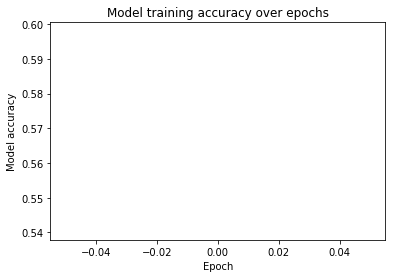

Prediction accuracy:0.51
[0.6863565301895141, 0.5099999904632568]
Performing 10-fold CV with 50 neurons...
Training ...
CV on test set at index 0 has 0.6600000262260437 accuracy
CV on test set at index 1 has 0.6899999976158142 accuracy
CV on test set at index 2 has 0.6700000166893005 accuracy
CV on test set at index 3 has 0.7699999809265137 accuracy
CV on test set at index 4 has 0.7200000286102295 accuracy
CV on test set at index 5 has 0.7599999904632568 accuracy
CV on test set at index 6 has 0.6969696879386902 accuracy
CV on test set at index 7 has 0.6363636255264282 accuracy
CV on test set at index 8 has 0.6666666865348816 accuracy
CV on test set at index 9 has 0.6161616444587708 accuracy
Mean accuracy is 0.6886161684989929
Training and evaluating done.
Performing 10-fold CV with 500 neurons...
Training ...
CV on test set at index 0 has 0.6399999856948853 accuracy
CV on test set at index 1 has 0.7099999785423279 accuracy
CV on test set at index 2 has 0.6899999976158142 accuracy
CV on

In [40]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas
import seaborn as sns
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from sklearn import ensemble

#Read coordinate csv. Col 1 is x coords and Col2 is y coords. 
def read_coords(filename):     
    myFile = open(filename) 
    row =0 
    coords =[] 
    for line in myFile:
        #skip first line as it contains labels
        if row > 0:
            coords.append(line.rstrip().split(",")[:])
        row = row+1
        #coords[row] = line.rstrip().split(",")[:] 
    myFile.close()
    return coords

def normalise(data):
    #Transpose, take out labels and convert remaining data to float
    data = data.transpose()
    label = data[0]
    data = data[1:]
    data = data.astype(float)
    #Enumerate through each col then each point in all
    #Do z = (xi - min(x))/(max(x)-min(x)) to normalise where x marks the set of numbers
    for j, col in enumerate(data):
        #Get min and max to be able to normalise
        cMax = np.amax(col)
        cMin = np.amin(col)
        for i, x in enumerate(col):
            norm = (x - cMin)/(cMax - cMin)
            #Write back
            data[j][i] = norm
    #Construct mutated data into original array with labels that we do by
    #creating new list, adding labels and the dataset, converting to np array then transposing back to original dim
    newData = []
    newData.append(label)
    newData[1:] = data
    newData = np.asarray(newData)
    newData = newData.transpose()
    return newData

def summarise(data):
    print("This set has a dimension of " , data.shape)
    #This will contain a series of tuples that charectarise each row
    summary = []
    cols = ['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3', 'Power_range_sensor_4', 'Pressure_sensor_1', 'Pressure_sensor_2','Pressure_sensor_3', 'Pressure_sensor_4', 'Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4']
    rows = ["Mean", "Standard Deviation", "Min", "Max"]
    #Turn around so we can process numbers as rows and exclude Status
    data = data.transpose()
    data = data[1:]
    data = data.astype(float)
    for col in data:
        #Create tuple for each property (e.g. Power_range_sensor_1)
        temp = (np.mean(col), np.std(col), np.amin(col), np.amax(col))
        summary.append(temp)
    #Create table
    dataFrame = pandas.DataFrame(summary, columns=rows, index=cols)
    print(dataFrame)
    #Normally I would use Mean/Std/Min/Max as y axis labels but in this case the table would be too wide
    #So .transpose() would make it more difficult to read
    
def genBoxPlot(data):
    #Get the desired feature against the state, then zip into tuples
    joined = list(zip(data[:,0], data[:,9]))
    #Convert to np for np functionality
    joined = np.asarray(joined)
    #Find indices where the states are either normal, or abnormal and seperate them into different arrays so that we can do
    #different subplots broken down by state
    index = np.where(joined[0:,] == "Normal")[0]
    normals = joined[index][:,1]
    index = np.where(joined[0:,] == "Abnormal")[0]
    abnormals = joined[index][:,1]
    #
    normals = normals.astype(float)
    abnormals = abnormals.astype(float)
    #Set plot properties
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Normal and Abnormal state against Vibration Sensor 1')
    ax.set_ylabel("Vibration Sensor 1")
    ax.set_xlabel("State")
    #ax.set_xticklabels(["Normal", "Abnormal"])
    ax.boxplot([normals, abnormals], labels=["Normal", "Abnormal"])
    plt.show();
    
def genDensityPlot(data):
    #Get the desired feature against the state, then zip into tuples
    joined = list(zip(data[:,0], data[:,10]))
    #Convert to np for np functionality
    joined = np.asarray(joined)
    #Find indices where the states are either normal, or abnormal and seperate them into different arrays so that we can do
    #different subplots broken down by state
    index = np.where(joined[0:,] == "Normal")[0]
    normals = joined[index][:,1]
    index = np.where(joined[0:,] == "Abnormal")[0]
    abnormals = joined[index][:,1]
    normals = normals.astype(float)
    abnormals = abnormals.astype(float)

    sns.kdeplot(normals, color="green", shade=True, legend=True, label="Normal")
    sns.kdeplot(abnormals, color="red", shade=True, legend=True, label="Abnormal")
    plt.legend()
    plt.ylabel("Density")
    plt.xlabel("Vibration Sensor 2")
    plt.title("Density of values measured by Vibration Sensor 2 by state")
    plt.show();
    
#ANN
# - 2 hidden layers
# - Sigmoid function
# - Hidden layer neurons: 500
# - 90/10 train and test
# - 
#####ANN

#Vary neurons from 50, 500, 1000 and do 10-fold CV on each
#Report mean accuracy for each parameter (so mean accuracy for 50 neuron, 500 neurons, 1000 neurons)
class NeuralNetwork:
    def __init__(self, data, trainProp, neurons, hiddenLayers, hiddenActiv, endActiv):
        self.data = data
        self.trainProp = trainProp
        self.hidden = hiddenLayers
        self.neurons = neurons
        self.hidden_activation = hiddenActiv
        self.end_activation = endActiv

    def splitData(self, trainProp = 0.9):
        #Shuffle
        np.random.shuffle(self.data)
        elems = len(data)
        #Define set proportions we want
        test_prop = 1 - trainProp

        #Slice data array into two seperate arrays depending on proportions
        #Train 0 to elems*proportion, test elems*proportion-1 to last
        train_data = self.data[0:int(elems*trainProp)].transpose()
        test_data = self.data[int(elems*trainProp)-1:-1].transpose()
        #Split then transform string state to booleans
        x_train = train_data[1:,].transpose()
        y_train = train_data[0]
        y_train[y_train=="Normal"] = 0
        y_train[y_train=="Abnormal"] = 1

        x_test = test_data[1:,].transpose()
        y_test = test_data[0]
        y_test[y_test=="Normal"] = 0
        y_test[y_test=="Abnormal"] = 1

        return [x_train,y_train], [x_test,y_test]
    
    def plotTrainAccuracy(self):
        #Plot accuracy against epochs
        plt.plot(self.history.history['accuracy'])
        plt.ylabel("Model accuracy")
        plt.xlabel("Epoch")
        plt.title("Model training accuracy over epochs")
        plt.show()
    
    def train(self, ep = 1):
        #Split data and save as class variables
        self.train, self.test = self.splitData(self.trainProp)
        #Init Keras, add layers
        self.model = Sequential()
        #First layer takes in 12 features and all rows
        self.model.add(Dense(units=self.neurons, input_shape=(12,)))
        #For all hidden layers, add
        for i in range(self.hidden):
            self.model.add(Dense(units=self.neurons, activation=self.hidden_activation, input_dim=(996,)))
        #Add output layer, then compile and fit, then plot at the end of training
        self.model.add(Dense(units=1, activation=self.end_activation))
        self.model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
        self.history = self.model.fit(self.train[0], self.train[1], epochs=ep)
        self.plotTrainAccuracy();
    
    def predict(self):
        predicted = self.model.predict(self.test[0])
        #Calc accuracy, between predicted and ground y
        test_y = np.asarray(self.test[1]).transpose()
        test_y = test_y.astype(float)
        
        corr = 0 
        for i in range(len(test_y)):
            if int(np.round(predicted[i][0])) == int(test_y[i]):
                corr = corr + 1
        print("Prediction accuracy:" + str(float(corr/len(test_y))))
        
        score = self.model.evaluate(self.test[0], self.test[1], verbose=2)
        print(score) #keras built in scoring
    
    #Partition data into n folds
    def partition(self, chunks):
        temp_data = self.data
        temp_data[temp_data=="Normal"] = 0
        temp_data[temp_data=="Abnormal"] = 1
        partitions = np.array_split(temp_data, 10)
        return partitions
    
    def makeTrainSet(self, parts, currTestIdx):
        #Makes train set from all partitions that arent the delegated test set
        concat = []
        for i in range(0, len(parts)):
            if i != currTestIdx:
                for row in parts[i]:
                    concat.append(row)
        concat = np.asarray(concat)
        return concat
    
    def nfold_cv(self, chunks, ep_each):
        parts = self.partition(chunks)
        testPartition = 0
        #Mean accuracy
        accuracies = []
        #Lets assign first set as test first, then use other 9 as train
        while testPartition < chunks:
            #Build new model for each iteration
            self.model = Sequential()
            self.model.add(Dense(units=self.neurons, input_shape=(12,)))
            for j in range(self.hidden):
                self.model.add(Dense(units=self.neurons, activation=self.hidden_activation, input_dim=(996,)))
            self.model.add(Dense(units=1, activation=self.end_activation))
            self.model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
            #Then get the train set excluding the delegated test set
            train = self.makeTrainSet(parts, testPartition)
            train = train.transpose()
            train_x = train[1:,].transpose()
            train_y = train[0]
            self.history = self.model.fit(train_x, train_y, epochs=ep_each, verbose=0)

            #Network is trained, now predict on assigned test partition
            test = parts[testPartition].transpose()
            test_x = test[1:,].transpose()
            test_y = test[0]
            predicted = self.model.predict(test_x)
            score = self.model.evaluate(test_x, test_y, verbose=2)
            print("CV on test set at index " + str(testPartition) + " has " + str(score[1]) + " accuracy")
            accuracies.append(score[1])
            #Assign next partition as test
            testPartition = testPartition + 1
        mean = sum(accuracies)/len(accuracies)
        print("Mean accuracy is " + str(mean))
        return mean
        
    def assess_params(self, neuronarr, n, ep_each):
        means = []
        for elem in neuronarr:
            self.neurons = elem
            print("Performing " + str(n) + "-fold CV with " + str(self.neurons) + " neurons...")
            print("Training ...")
            mean = self.nfold_cv(n, ep_each)
            means.append(mean)
            print("Training and evaluating done.")
        print("Assessment finished.")
        for i in range(len(neuronarr)):
            print("Mean accuracy: " + str(means[i]) + " for neurons = " + str(neuronarr[i]))
            
        
###Random Forest
#Vary trees from 20, 500, 10000 and do 10-fold CV on each (with min samples = 5)
#Report mean accuracy for each parameter (so mean accuracy for 20 trees, 500 trees, 10000 trees)
class RandomForest():
    def __init__(self, trees, min_samples, train, test):
        #Random Forest should be taking in the same training and test data (same shuffle and length)
        #so we can initialise it with data taken from ANN
        self.trees = trees
        self.min_samples_leaf = min_samples
        self.train = train
        self.test = test
        
    def train_model(self):
        self.tree = ensemble.RandomForestClassifier(n_estimators = self.trees, criterion='entropy', min_samples_leaf=self.min_samples_leaf)
        self.tree.fit(self.train[0], self.train[1])
        
    def predict(self):
        #Predict, then measure accuracy
        predicted = self.tree.predict(self.test[0])
        accuracy = self.measure_accuracy(predicted)
        print("Prediction accuracy:" + str(accuracy))
        return accuracy
        
    def measure_accuracy(self, predicted):
        corr = 0
        for i in range(len(predicted)):
            if(int(predicted[i]) == int(test[1][i])):
                corr = corr + 1
        return float(corr/len(predicted))
    
    #This takes in an array of trees, and min samples at the leaf, trains a model each with these parameters
    #and graphs accuracies for parameters
    def measure_all_params(self, trees, min_at_leaf):
        accuracies = {}
        #For each minimum sample, train with array of trees one by one
        for minim in min_at_leaf:
            self.min_samples_leaf = minim
            accuracies[minim] = []
            for num in trees:
                #Set trees, train, then predict and save accuracy
                self.trees = num
                self.train_model()
                accuracy = self.predict()
                accuracies[minim].append(accuracy)
        #Plot
        self.plot_accuracies(accuracies, trees)
        
    def plot_accuracies(self, accuracies, trees):
        #Subplot
        fig, axs = plt.subplots(1, 2, figsize=(14, 4))
        keyindex = 0
        #Colours for each number of tree
        cols = ["#000000", "#ff0000", "#ff00ff", "#5ac18e", "#0000ff"]
        for key in accuracies.keys():
            numbers = np.arange(1, len(trees)+1)
            for i in range(len(trees)):
                axs[keyindex].scatter(numbers[i], accuracies[key][i], label=str(trees[i])+" trees", color=cols[i])
            axs[keyindex].set_xlabel("Point")
            axs[keyindex].set_ylabel("Accuracy")
            axs[keyindex].set_title("Accuracy against number of trees at " + str(key) + " samples at leaf")
            axs[keyindex].grid(True)
            axs[keyindex].legend()
            keyindex = keyindex + 1
###Random Forest

data = read_coords("ML2_dataset.csv")
data = np.asarray(data) 
summarise(data)
#Normalise dataset between 0 and 1
normalised = normalise(data)
#summarise(normalised)
#genBoxPlot(normalised)
#genDensityPlot(normalised)

net = NeuralNetwork(normalised, 0.9,500,2,'tanh','sigmoid')
net.train(1)
net.predict()
#Section 4:
net.assess_params([50, 500, 1000], 10, 30)

#To use the same shuffled data, get them out of the ANN
train = net.train
test = net.test

#forest = RandomForest(1000, 5, train, test)
#forest.measure_all_params([10, 50, 100, 1000, 5000], [5, 50])

#forest.train(train)
#forest.predict(test)


